In [ ]:
## Load Cleaned Dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
df = pd.read_csv("../data/processed/expenses_clean.csv")

df.head()


,date,groceries,rent,transportation,gym,utilities,healthcare,investments,savings,emi_loans,dining_and_entertainment,shopping_and_wants,total_expenditure,income,savings_rate,investment_rate,expense_ratio,year,month_num
0,2020-01-01,4860,10000,2595,888,1520,1930,4311,4232,0,3138,1121,30363,40000,0.105800,0.107775,0.759075,2020,1
1,2020-02-01,6135,10000,2371,851,1630,1923,5939,7329,0,3185,2332,34366,40000,0.183225,0.148475,0.859150,2020,2
2,2020-03-01,6853,10000,2715,1143,1776,1185,4700,3625,0,2684,1459,32515,36000,0.100694,0.130556,0.903194,2020,3
3,2020-04-01,6904,10000,2582,869,1975,1274,4420,6426,0,2475,2806,33305,36000,0.178500,0.122778,0.925139,2020,4
4,2020-05-01,4562,10000,3028,830,1984,1631,4410,3647,0,2146,1020,29611,36000,0.101306,0.122500,0.822528,2020,5


In [ ]:
## Data Overview

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      69 non-null     object 
 1   groceries                 69 non-null     int64  
 2   rent                      69 non-null     int64  
 3   transportation            69 non-null     int64  
 4   gym                       69 non-null     int64  
 5   utilities                 69 non-null     int64  
 6   healthcare                69 non-null     int64  
 7   investments               69 non-null     int64  
 8   savings                   69 non-null     int64  
 9   emi_loans                 69 non-null     int64  
 10  dining_and_entertainment  69 non-null     int64  
 11  shopping_and_wants        69 non-null     int64  
 12  total_expenditure         69 non-null     int64  
 13  income                    69 non-null     int64  
 14  savings_rate

,groceries,rent,transportation,gym,utilities,healthcare,investments,savings,emi_loans,dining_and_entertainment,shopping_and_wants,total_expenditure,income,savings_rate,investment_rate,expense_ratio,year,month_num
count,69.000000,69.00000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,6286.913043,11000.00000,2569.260870,967.768116,1978.898551,1750.420290,6317.000000,7612.550725,1130.434783,2739.594203,1963.753623,36704.043478,50446.376812,0.149773,0.125395,0.740418,2022.391304,6.304348
std,1233.330400,1424.57424,577.704373,149.508523,304.688228,577.078173,1459.367671,2257.266674,2363.403848,679.530641,578.126803,5843.735745,10268.750135,0.028020,0.014069,0.095495,1.673473,3.414090
min,4154.000000,10000.00000,1501.000000,700.000000,1514.000000,837.000000,3952.000000,3625.000000,0.000000,1501.000000,1020.000000,28791.000000,36000.000000,0.100694,0.100023,0.587500,2020.000000,1.000000
25%,5158.000000,10000.00000,2095.000000,851.000000,1683.000000,1289.000000,5161.000000,6072.000000,0.000000,2146.000000,1470.000000,32829.000000,43200.000000,0.128062,0.115839,0.666312,2021.000000,3.000000
50%,6368.000000,10000.00000,2604.000000,1001.000000,1980.000000,1635.000000,6255.000000,7329.000000,0.000000,2743.000000,1902.000000,34111.000000,48000.000000,0.150812,0.127417,0.731797,2022.000000,6.000000
75%,6931.000000,13000.00000,3035.000000,1084.000000,2240.000000,2068.000000,7089.000000,9430.000000,0.000000,3185.000000,2369.000000,40672.000000,64000.000000,0.177222,0.134606,0.800321,2024.000000,9.000000
max,8983.000000,13000.00000,3482.000000,1196.000000,2471.000000,2958.000000,9496.000000,12074.000000,6000.000000,3991.000000,2981.000000,49167.000000,64000.000000,0.198021,0.149333,0.968556,2025.000000,12.000000


In [ ]:
## Date Column Correction

print("Date Column data type before correction:", df.dtypes['date'])

df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date").drop_duplicates()
print("Date Column data type after correction:", df.dtypes['date'])

Date Column data type before correction: object
Date Column data type after correction: datetime64[ns]


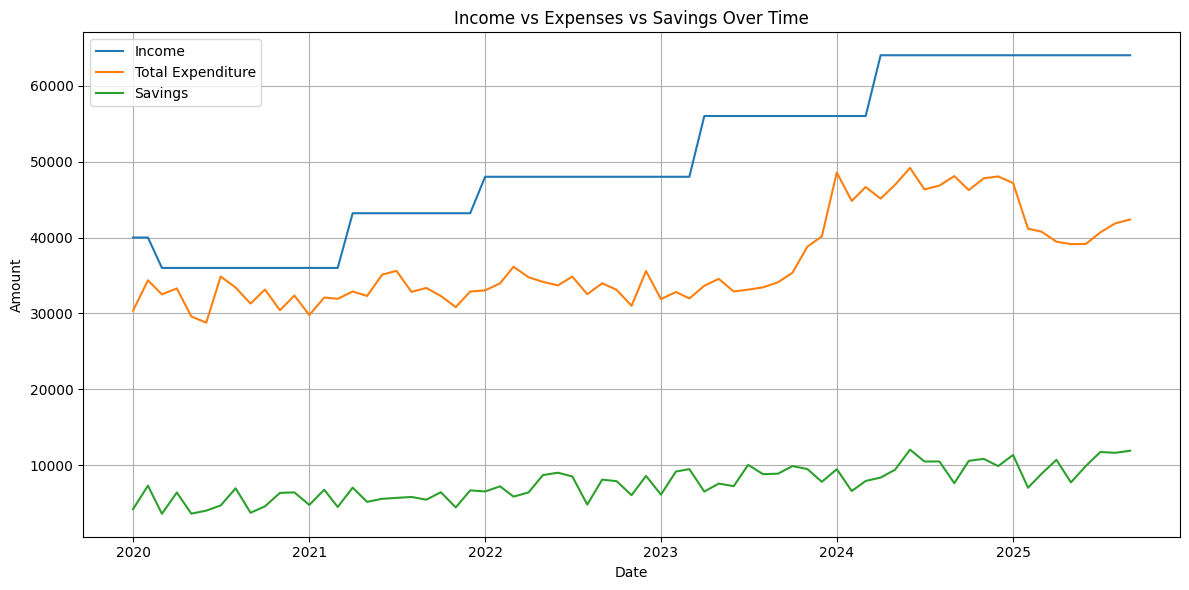

In [ ]:
## Income, Expenses, and Savings Over Time

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.plot(df['date'], df['income'], label='Income')
plt.plot(df['date'], df['total_expenditure'], label='Total Expenditure')
plt.plot(df['date'], df['savings'], label='Savings')

plt.title("Income vs Expenses vs Savings Over Time")
plt.xlabel("Date")
plt.ylabel("Amount")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Despite steady income growth, savings exhibit limited proportional 
# increase due to parallel growth in total expenditure, indicating lifestyle inflation.


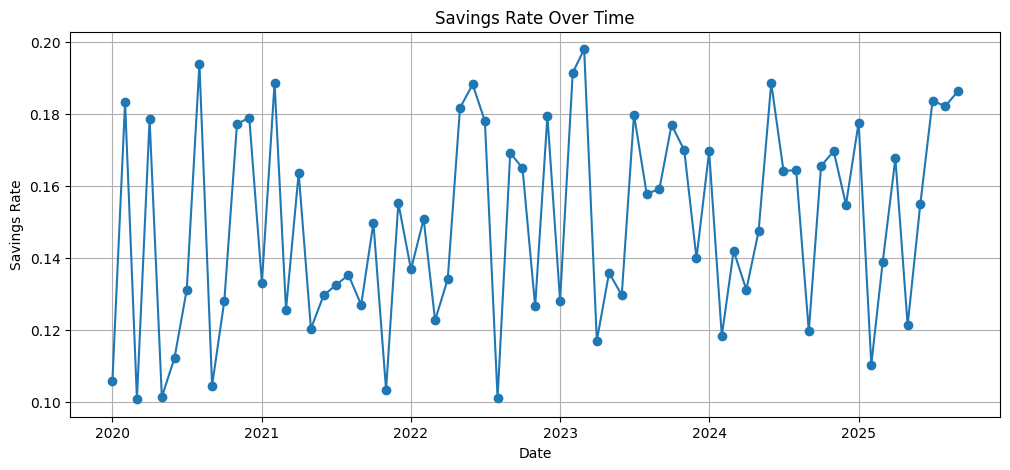

In [ ]:
## Check how savings rate changes over time

plt.figure(figsize=(12,5))

plt.plot(df['date'], df['savings_rate'], marker='o')

plt.title("Savings Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Savings Rate")
plt.grid(True)

plt.show()

# This shows that the savings time series has no upward trend over time.


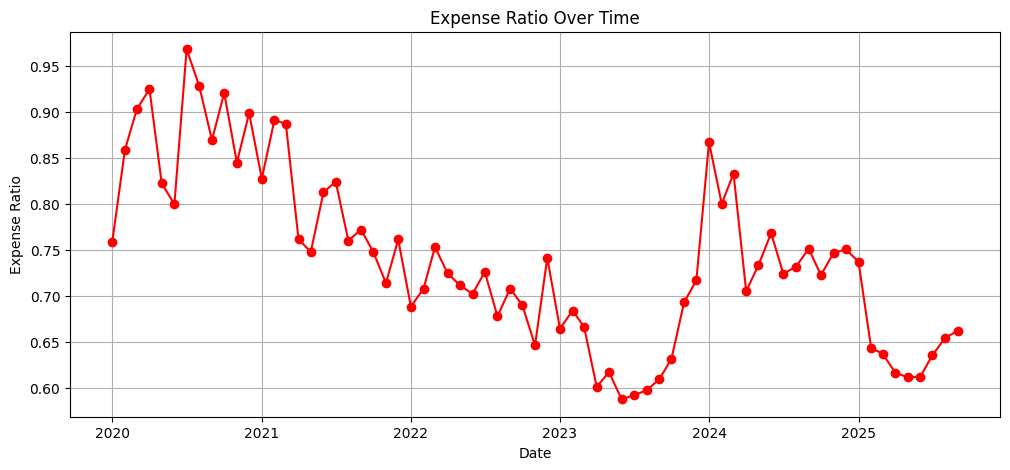

In [ ]:
## Check how expense ratio changes over time (Expneses/Income)

plt.figure(figsize=(12,5))

plt.plot(df['date'], df['expense_ratio'], color='red', marker='o')

plt.title("Expense Ratio Over Time")
plt.xlabel("Date")
plt.ylabel("Expense Ratio")
plt.grid(True)

plt.show()

# This shows that the expense ratio of expense/income has a downward trend over time.
# but increases in 2024 and starts going back down again.


In [ ]:
## Key Insights
### Income, Spending, and Savings Dynamics


# Income increased significantly between 2020 and 2025.
# Expense growth closely followed income growth, limiting savings expansion.
# Savings and investment rates remained relatively stable due to lifestyle inflation.
# Major optimization opportunities exist in discretionary spending categories.

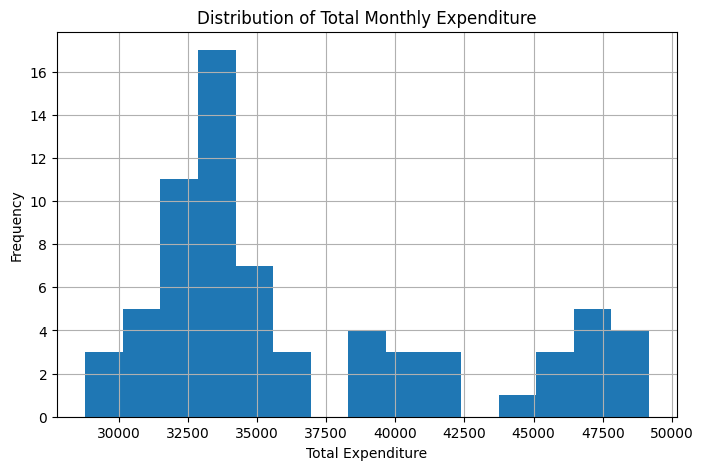

In [ ]:
## Distribution Analysis
# Distribution of Total Monthly Expenditure
plt.figure(figsize=(8,5))

plt.hist(df['total_expenditure'], bins=15)

plt.title("Distribution of Total Monthly Expenditure")
plt.xlabel("Total Expenditure")
plt.ylabel("Frequency")

plt.grid(True)
plt.show()

# Monthly expenditures exhibit a multi-modal distribution, 
# reflecting distinct spending phases aligned with income growth over time.

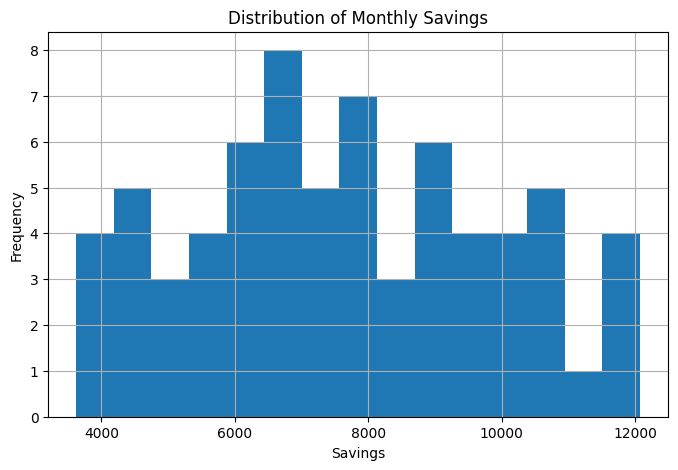

In [ ]:
# Distribution of Monthly Savings
plt.figure(figsize=(8,5))

plt.hist(df['savings'], bins=15)

plt.title("Distribution of Monthly Savings")
plt.xlabel("Savings")
plt.ylabel("Frequency")

plt.grid(True)
plt.show()

# Savings are distributed across three primary ranges, with no prolonged 
# periods of near-zero accumulation, indicating consistent saving behavior.

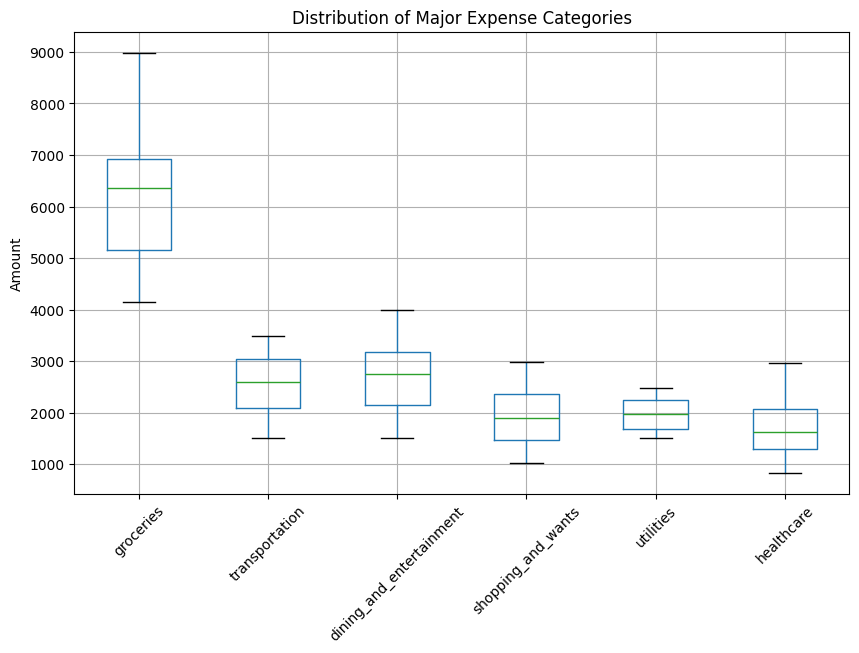

In [ ]:
# Distribution of Major Expense Categories
key_cols = [
    'groceries',
    'transportation',
    'dining_and_entertainment',
    'shopping_and_wants',
    'utilities',
    'healthcare'
]

plt.figure(figsize=(10,6))

df[key_cols].boxplot()

plt.title("Distribution of Major Expense Categories")
plt.ylabel("Amount")
plt.xticks(rotation=45)

plt.grid(True)
plt.show()

# Groceries and dining exhibit the highest variability, indicating they are primary 
# drivers of expenditure volatility and represent key opportunities for cost optimization.

In [ ]:

### Key Findings from Distribution Analysis

# Total monthly expenditure displays a multi-modal distribution, reflecting distinct spending phases aligned with income growth.
# Savings are consistently distributed across low, medium, and high ranges, with no prolonged periods of near-zero accumulation.
# Groceries and dining & entertainment exhibit the highest variability among expense categories.
# Utilities remain highly stable, while healthcare shows occasional spikes.
# Discretionary categories represent the main drivers of spending volatility and offer the greatest potential for cost optimization.


In [ ]:
## 8. Correlation Analysis
# Correlation between Numerical Variables
import seaborn as sns
import numpy as np

# Select numeric columns only
num_df = df.select_dtypes(include=[np.number])

corr = num_df.corr()

corr.round(2)


,groceries,rent,transportation,gym,utilities,healthcare,investments,savings,emi_loans,dining_and_entertainment,shopping_and_wants,total_expenditure,income,savings_rate,investment_rate,expense_ratio,year,month_num
groceries,1.00,0.69,0.05,-0.04,-0.04,0.48,0.41,0.55,0.46,0.01,0.15,0.73,0.57,0.24,-0.18,-0.03,0.54,0.11
rent,0.69,1.00,0.00,-0.04,0.01,0.78,0.70,0.65,0.68,-0.14,0.06,0.91,0.82,0.14,-0.05,-0.22,0.81,0.01
transportation,0.05,0.00,1.00,-0.04,-0.40,0.08,-0.03,-0.02,0.06,-0.27,-0.16,0.07,-0.12,0.09,0.17,0.31,-0.10,0.04
gym,-0.04,-0.04,-0.04,1.00,0.18,-0.14,0.09,-0.04,0.03,-0.06,0.05,0.03,0.05,-0.13,0.03,-0.08,0.04,-0.01
utilities,-0.04,0.01,-0.40,0.18,1.00,-0.14,-0.12,-0.06,0.15,0.12,0.16,0.06,0.05,-0.14,-0.33,-0.03,0.04,-0.06
healthcare,0.48,0.78,0.08,-0.14,-0.14,1.00,0.53,0.50,0.55,-0.18,0.02,0.72,0.59,0.13,0.02,-0.08,0.58,-0.01
investments,0.41,0.70,-0.03,0.09,-0.12,0.53,1.00,0.73,0.46,-0.09,-0.10,0.72,0.86,0.26,0.45,-0.54,0.85,-0.02
savings,0.55,0.65,-0.02,-0.04,-0.06,0.50,0.73,1.00,0.44,0.01,0.03,0.68,0.81,0.73,0.06,-0.50,0.79,0.12
emi_loans,0.46,0.68,0.06,0.03,0.15,0.55,0.46,0.44,1.00,-0.07,0.17,0.86,0.55,0.09,-0.05,0.10,0.49,-0.03
dining_and_entertainment,0.01,-0.14,-0.27,-0.06,0.12,-0.18,-0.09,0.01,-0.07,1.00,-0.10,-0.01,-0.05,0.08,-0.09,0.06,-0.07,-0.14


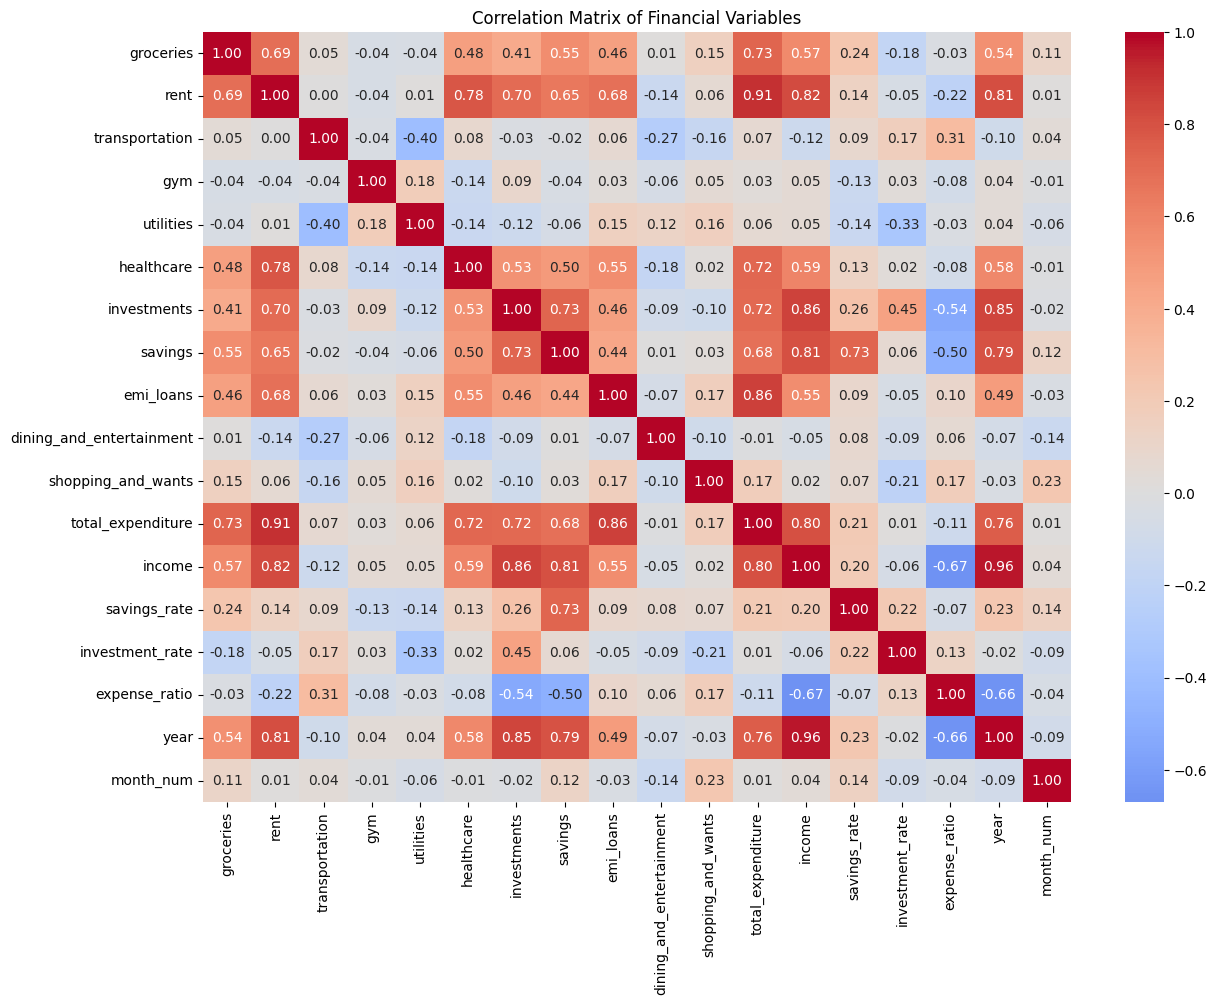

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(14,10))

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0
)

plt.title("Correlation Matrix of Financial Variables")
plt.show()

# Housing costs represent the strongest structural driver of total expenditure.

In [ ]:
# Correlation of Target Variables
target_corr = corr[
    ['savings', 'savings_rate', 'expense_ratio', 'total_expenditure']
].sort_values(by='savings', ascending=False)

target_corr

# Groceries and healthcare are major secondary contributors to expenditure variability.
# Savings and investments exhibit strong coupling, indicating a consistent wealth accumulation strategy.
# Financial risk, measured by expense ratio, decreases significantly with income growth and improved savings behavior.
# Discretionary spending exhibits weak correlation with income, suggesting behavioral rather than structural drivers.

,savings,savings_rate,expense_ratio,total_expenditure
savings,1.000000,0.729036,-0.495262,0.681252
income,0.805728,0.201262,-0.669851,0.804596
year,0.794046,0.226948,-0.657471,0.759982
investments,0.731591,0.258836,-0.535134,0.718655
savings_rate,0.729036,1.000000,-0.066335,0.210696
total_expenditure,0.681252,0.210696,-0.111122,1.000000
rent,0.649440,0.136031,-0.219236,0.907024
groceries,0.552062,0.242906,-0.027742,0.731629
healthcare,0.495230,0.129434,-0.078105,0.723768
emi_loans,0.436904,0.087581,0.096369,0.860218


In [ ]:
### Key Findings from Correlation Analysis

# Income exhibits strong positive correlations with savings (0.81), investments (0.86), and total expenditure (0.80), indicating income growth as the primary financial driver.
# Rent shows the strongest correlation with total expenditure (0.91), highlighting housing costs as the dominant structural expense.
# Groceries and healthcare are major secondary contributors to spending variability.
# Savings and investments are strongly correlated (0.73), reflecting consistent wealth accumulation behavior.
# Expense ratio is negatively correlated with income (-0.67), savings (-0.50), and year (-0.66), indicating improving financial stability over time.
# Discretionary categories such as dining and shopping display weak correlations, suggesting behavior-driven variability.
